<a href="https://colab.research.google.com/github/dsgustavomoreira/Regras-Associacao-Mercado/blob/main/Regras_de_Associa%C3%A7%C3%A3o_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1º - Problema de Negócio**
O objetivo deste caso é identificar Regras de Associação de produtos em uma base de dados de um mercado real.

# **2º - Análise Exploratória dos Dados:**

In [358]:
! pip install apyori
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [359]:
mercado = pd.read_csv('/content/drive/MyDrive/DS Gustavo Moreira/Udemy/mercado2.csv', header=None)
mercado

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
len(mercado)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7501

In [361]:
for index in mercado.columns:
  mercado[index] = mercado[index].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [362]:
# Verificar a quantidade de produtos diferentes há na base e quais são eles
# A variável 'itens' recebe a junção (função melt) dos valores de forma ordenada
itens = mercado.melt()['value'].dropna().sort_values()
print(f'Existem {itens.nunique()} produtos distintos:\n', itens.unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Existem 119 produtos distintos:
 ['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffins'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


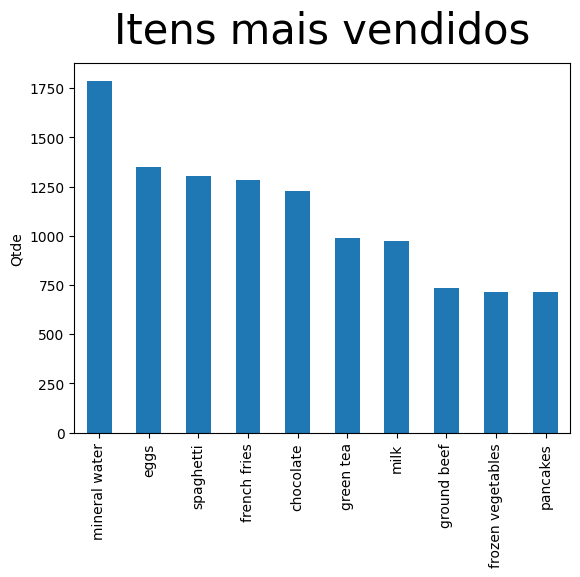

In [363]:
# Verificação de quais produtos foram mais vendidos
qtde_itens = itens.value_counts()
barra = qtde_itens.nlargest(10).plot(kind='bar')
barra.set_title('Itens mais vendidos', size=30, weight=500, pad=15)
barra.set_ylabel('Qtde')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


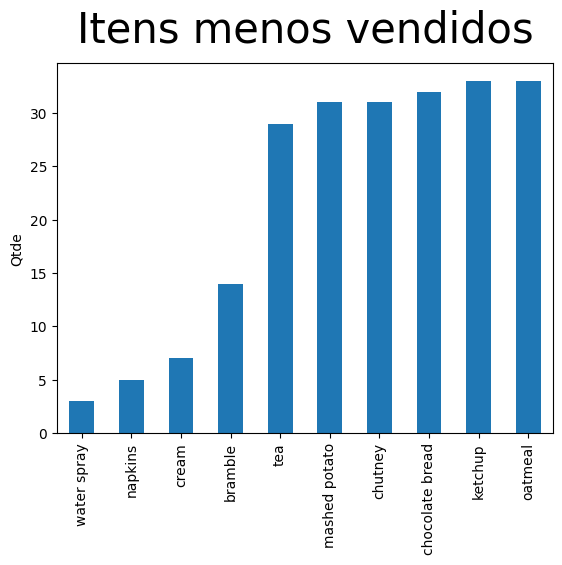

In [364]:
# Verificação de quais produtos foram menos vendidos
qtde_itens = itens.value_counts()
barra = qtde_itens.nsmallest(10).plot(kind='bar')
barra.set_title('Itens menos vendidos', size=30, weight=500, pad=15)
barra.set_ylabel('Qtde')
plt.show()

In [365]:
# Adicionando a quantidade de itens (não nulos) que há em cada registro (mesmo que seja somente 1)
qtde_por_cesta = mercado.notna().apply(sum, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [366]:
# Separando os registros que possuem mais de 1 item
cestas = [set(linha.dropna()) for _, linha in mercado[qtde_por_cesta > 1].iterrows()]
cestas[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'}]

In [367]:
len(cestas)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5747

In [368]:
mercado = pd.DataFrame(cestas)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [369]:
len(mercado)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5747

# **3º - Pré-Processamento dos Dados:**



In [370]:
# Transformando os dados em formato de lista
transacoes = []
for i in range(mercado.shape[0]):
    # Usando list comprehension para criar a lista, excluindo valores nulos
    transaction = [str(mercado.values[i, j]) for j in range(mercado.shape[1]) if not pd.isna(mercado.values[i, j])]

    if transaction:
        transacoes.append(transaction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [371]:
transacoes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['avocado',
  'honey',
  'frozen smoothie',
  'almonds',
  'green grapes',
  'tomato juice',
  'low fat yogurt',
  'energy drink',
  'yams',
  'olive oil',
  'salad',
  'shrimp',
  'antioxydant juice',
  'salmon',
  'mineral water',
  'green tea',
  'whole weat flour',
  'spinach',
  'vegetables mix',
  'cottage cheese'],
 ['meatballs', 'burgers', 'eggs'],
 ['turkey', 'avocado'],
 ['whole wheat rice', 'energy bar', 'mineral water', 'milk', 'green tea'],
 ['french fries', 'whole wheat pasta'],
 ['light cream', 'shallot', 'soup'],
 ['frozen vegetables', 'green tea', 'spaghetti'],
 ['pet food', 'eggs'],
 ['cooking oil', 'burgers', 'turkey', 'mineral water', 'eggs'],
 ['cookies', 'champagne', 'spaghetti'],
 ['salmon', 'mineral water'],
 ['shrimp',
  'cooking oil',
  'oil',
  'chicken',
  'honey',
  'chocolate',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['tomatoes',
  'chicken',
  'salmon',
  'black tea',
  'turkey',
  'extra dark chocolate',
  'fresh tuna',
  'mineral water',
  'eggs',
 

# **4º - Aplicação APRIORI**

In [372]:
regras = apriori(transacoes, min_support = 0.04, min_confidence = 0.3, min_lift = 1)
resultados = list(regras)
len(resultados)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8

In [373]:
resultados[3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RelationRecord(items=frozenset({'mineral water', 'ground beef'}), support=0.05341917522185488, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'mineral water'}), confidence=0.4287709497206704, lift=1.4537738336546862)])

Exemplo de saída de regra a fim de analisar a decomposição dos elementos:
RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

In [374]:
# Codificação para retornar os resultados em formato de DataFrame
A = []
B = []
suporte = []
confianca = []
lift = []

for resultado in resultados:
  s = resultado[1]
  result_rules = resultado[2]
  for result_rule in result_rules:
    a = list(result_rule[0])
    b = list(result_rule[1])
    c = result_rule[2]
    l = result_rule[3]
    A.append(a)
    B.append(b)
    suporte.append(s)
    confianca.append(c)
    lift.append(l)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [375]:
rules_df = pd.DataFrame({'A': A, 'B': B, 'suporte': suporte, 'confianca': confianca, 'lift': lift})
rules_df.sort_values(by = 'confianca', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,A,B,suporte,confianca,lift
3,[ground beef],[mineral water],0.053419,0.428771,1.453774
4,[ground beef],[spaghetti],0.051157,0.410615,1.881820
2,[frozen vegetables],[mineral water],0.046633,0.385057,1.305561
5,[milk],[mineral water],0.062641,0.383387,1.299895
6,[pancakes],[mineral water],0.044023,0.375371,1.272718
7,[spaghetti],[mineral water],0.077954,0.357257,1.211301
0,[chocolate],[mineral water],0.068732,0.341696,1.158539
1,[eggs],[mineral water],0.066469,0.303657,1.029566


# **Conclusão**

Considerando os valores de Suporte, Confiança e Lift adotados, verificou-se que o item 'mineral water' é o que mais se destaca como regra consequente a partir dos produtos da regra antecedente que compuseram o market basket em questão.